<a href="https://colab.research.google.com/github/ADS-505-F22-Applied-Data-Sci-for-Biz/Final_Team_Project/blob/main/Team_Project_v1.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team Project

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import required packages
%matplotlib inline

!pip install matplotlib==3.1.3
# !python -m pip uninstall matplotlib
# !pip install matplotlib==3.1.3

import numpy as np
import pandas as pd
# Turn off warning messages
pd.options.mode.chained_assignment = None # default = 'warn'

import matplotlib.pylab as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

import missingno as mno

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

import scipy.special
import scipy.stats as stats
from scipy.stats import skew, kurtosis, shapiro

#!pip install cuml
#!pip install --pre --quiet pycaret
#from pycaret.classification import *

import warnings
warnings.filterwarnings('ignore')


#Book Authors package to gain access to datasets from book.
!pip install dmba
import dmba
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# Get data and review shape and content.
df = pd.read_csv('https://raw.githubusercontent.com/ADS-505-F22-Applied-Data-Sci-for-Biz/Final_Team_Project/main/Bank%20Customer%20Churn%20Prediction.csv')
print(df.shape)
print(df.columns)
df

(10000, 12)
Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
# Summary Satistics
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [27]:
# Check data skew
df.skew()

customer_id         0.001149
credit_score       -0.071607
age                 1.011320
tenure              0.010991
balance            -0.141109
products_number     0.745568
credit_card        -0.901812
active_member      -0.060437
estimated_salary    0.002085
churn               1.471611
dtype: float64

In [7]:
# Review Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
# Check for missing data
print(f'\nMissing Data:\n{df.isnull().sum()}')

print('\nTotal Missing Data:', df.isnull().sum().sum())


Missing Data:
customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Total Missing Data: 0


In [11]:
churned_french = df.churn[(df.country == 'France') & (df.churn == 1)].count()
count_french = df.churn[df.country == 'France'].count()
print("Percent of French People Who Churned --->", churned_french*100/count_french,'%')

churned_german = df.churn[(df.country == 'Germany') & (df.churn == 1)].count()
count_german = df.churn[(df.country == 'Germany')].count()
print("Percent of German People Who Churned --->", churned_german*100/count_german,"%")

churned_spain = df.churn[(df.country == 'Spain') & (df.churn == 1)].count()
count_spain = df.churn[(df.country == 'Spain')].count()
print("Percent of Spanish People Who Churned --->", churned_spain*100/count_spain,"%")

Percent of French People Who Churned ---> 16.15476665337056 %
Percent of German People Who Churned ---> 32.44320446392985 %
Percent of Spanish People Who Churned ---> 16.67339523617279 %


In [12]:
px.histogram(df,x='country', color = 'churn',barmode = 'group')

In [14]:
cat_vars = ['country', 'gender', 'products_number', 'credit_card', 'active_member']
num_vars = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

### Numeric EDA

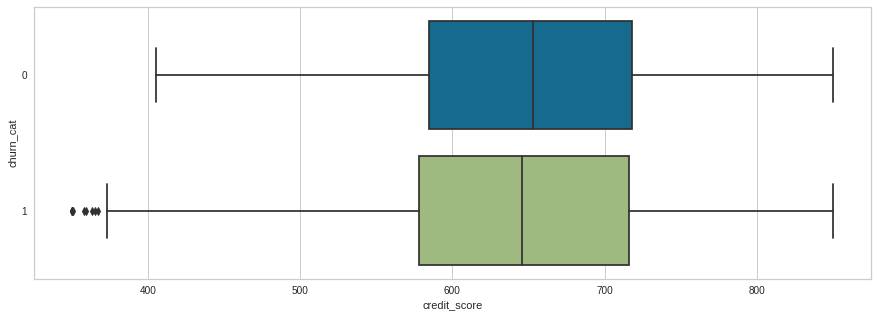

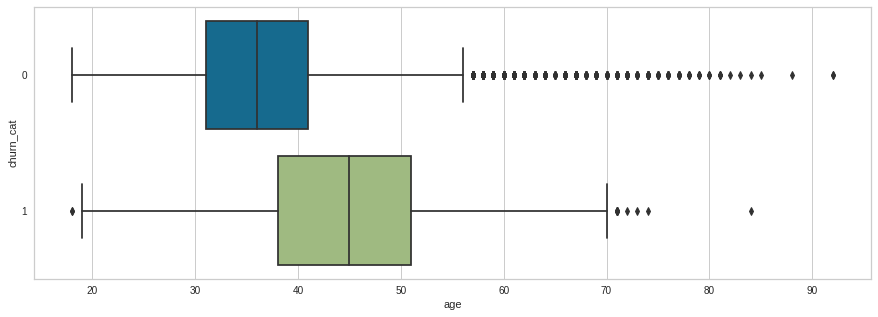

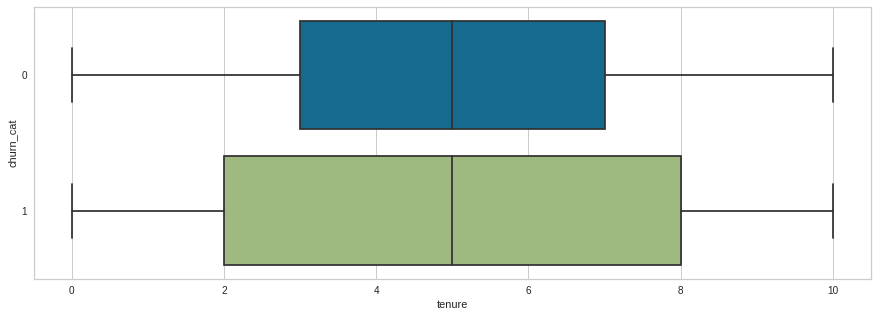

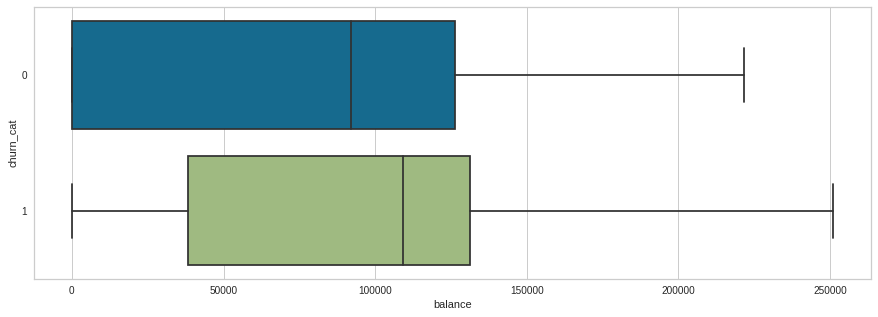

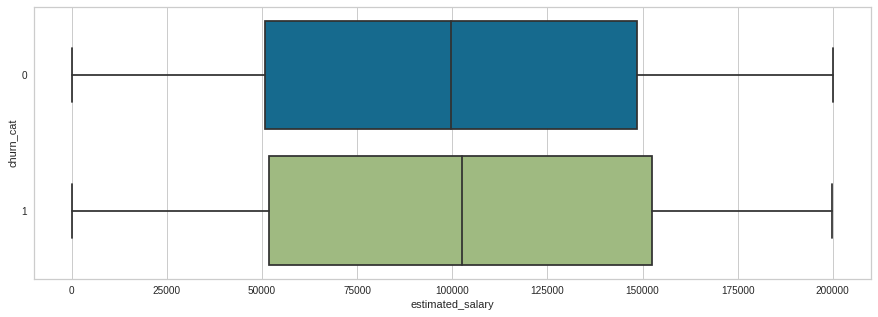

In [26]:
%matplotlib inline
temp_df = df
temp_df["churn_cat"] = temp_df["churn"].astype("category")

for col in num_vars:
  plt.figure(figsize=(15,5))
  ax = sns.boxplot(data = temp_df, x = col, y = 'churn_cat')
  plt.show()

### Categorical EDA

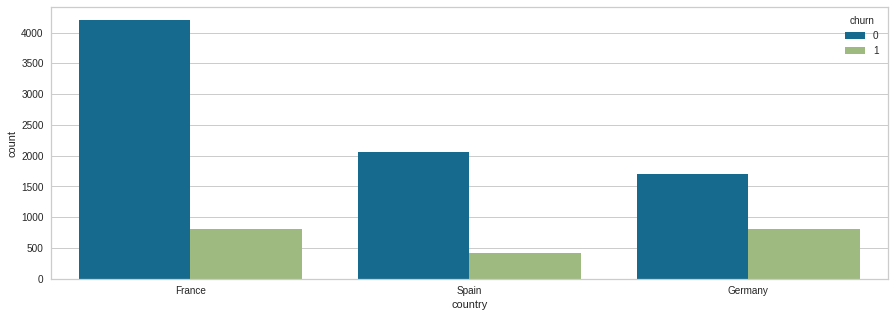

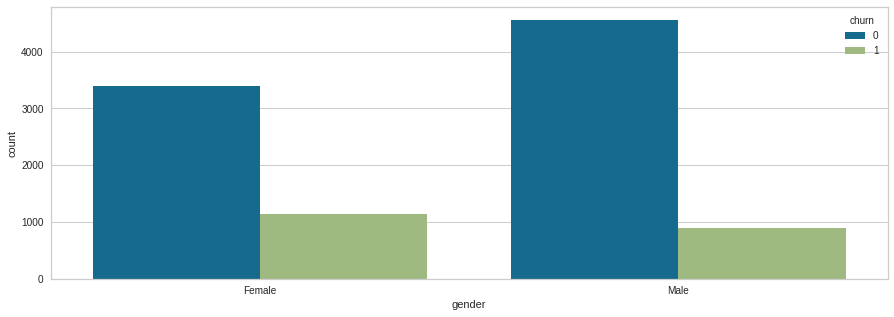

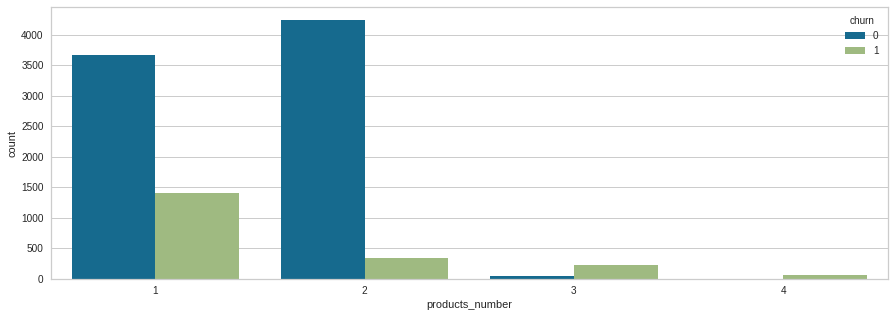

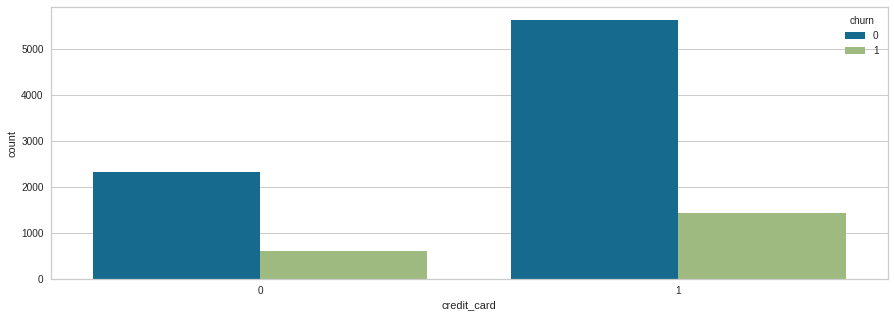

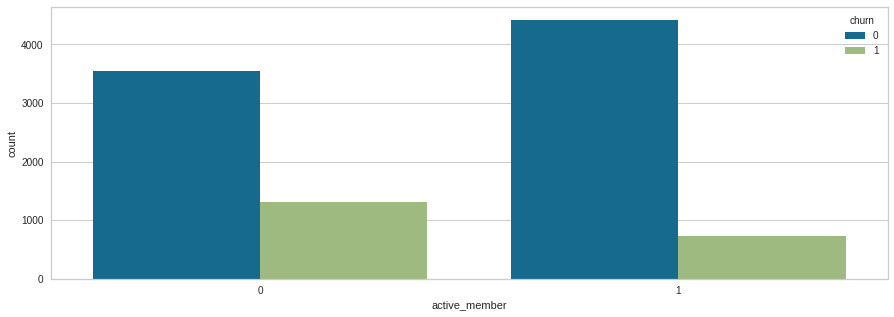

In [23]:
# Plot Category Data by Churn
for col in cat_vars:
  plt.figure(figsize=(15,5)) 
  ax = sns.countplot(data = df, x = col, hue = 'churn')
  plt.show()

In [30]:
print('******************')
print('Churn Balance:')
print('******************')
print(df.churn.value_counts(dropna=False, normalize = True))
print('\n')
for col in cat_vars:
  print('******************')
  print('{} split:'.format(col))
  print('******************')
  p1 = df[(df.churn == 1)].groupby(col).size().reset_index(name='yes_counts')
  p2 = df.groupby(col).size().reset_index(name='total_counts')
  p1['total_count'] = p2['total_counts']
  p1['percent_yes'] = p1['yes_counts']/p2['total_counts']
  print(p1)
  print('\n')

******************
Churn Balance:
******************
0    0.7963
1    0.2037
Name: churn, dtype: float64


******************
country split:
******************
   country  yes_counts  total_count  percent_yes
0   France         810         5014     0.161548
1  Germany         814         2509     0.324432
2    Spain         413         2477     0.166734


******************
gender split:
******************
   gender  yes_counts  total_count  percent_yes
0  Female        1139         4543     0.250715
1    Male         898         5457     0.164559


******************
products_number split:
******************
   products_number  yes_counts  total_count  percent_yes
0                1        1409         5084     0.277144
1                2         348         4590     0.075817
2                3         220          266     0.827068
3                4          60           60     1.000000


******************
credit_card split:
******************
   credit_card  yes_counts  total_count

## Bivariate EDA


In [9]:
# Look At Averages by Churn status
features = df.keys()
features = features.drop('churn')
subsets = ['credit_score']
df.groupby('churn')[features].mean().style.background_gradient(cmap = "ocean")

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
churn,,,,,,,,,
0,15691167.881703,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,15690051.964654,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [10]:
fig = px.histogram(df, x="age", y="balance", color="churn",
                   marginal="box",
                   hover_data=df.columns)
fig.show()

### Correlation Analysis

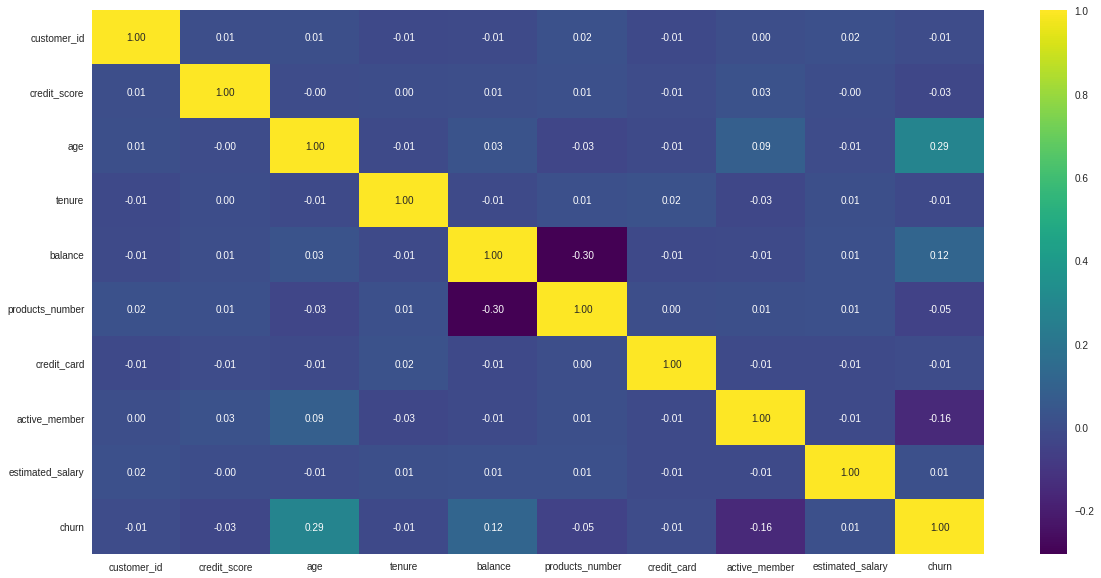

In [31]:
plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap = "viridis");

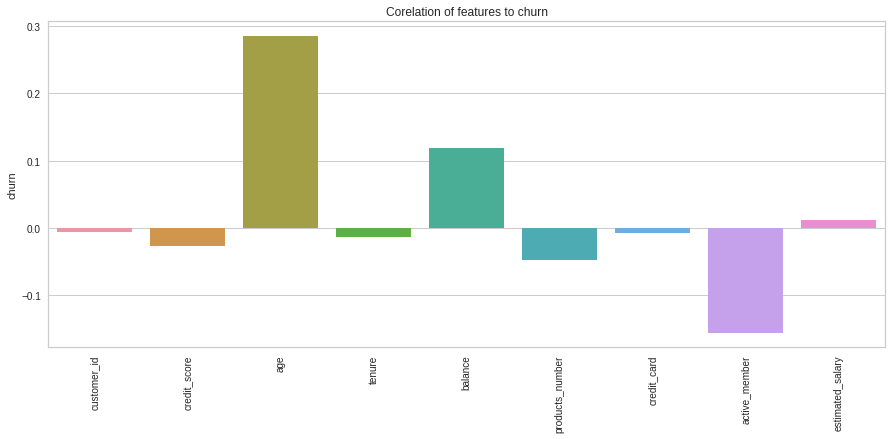

In [32]:
corr = df.corr().churn
plt.figure(figsize = (15,6))
sns.barplot(x = corr[:-1].index, y = corr[:-1])
plt.title("Corelation of features to churn")
plt.xticks(rotation=90);

### Pairplots

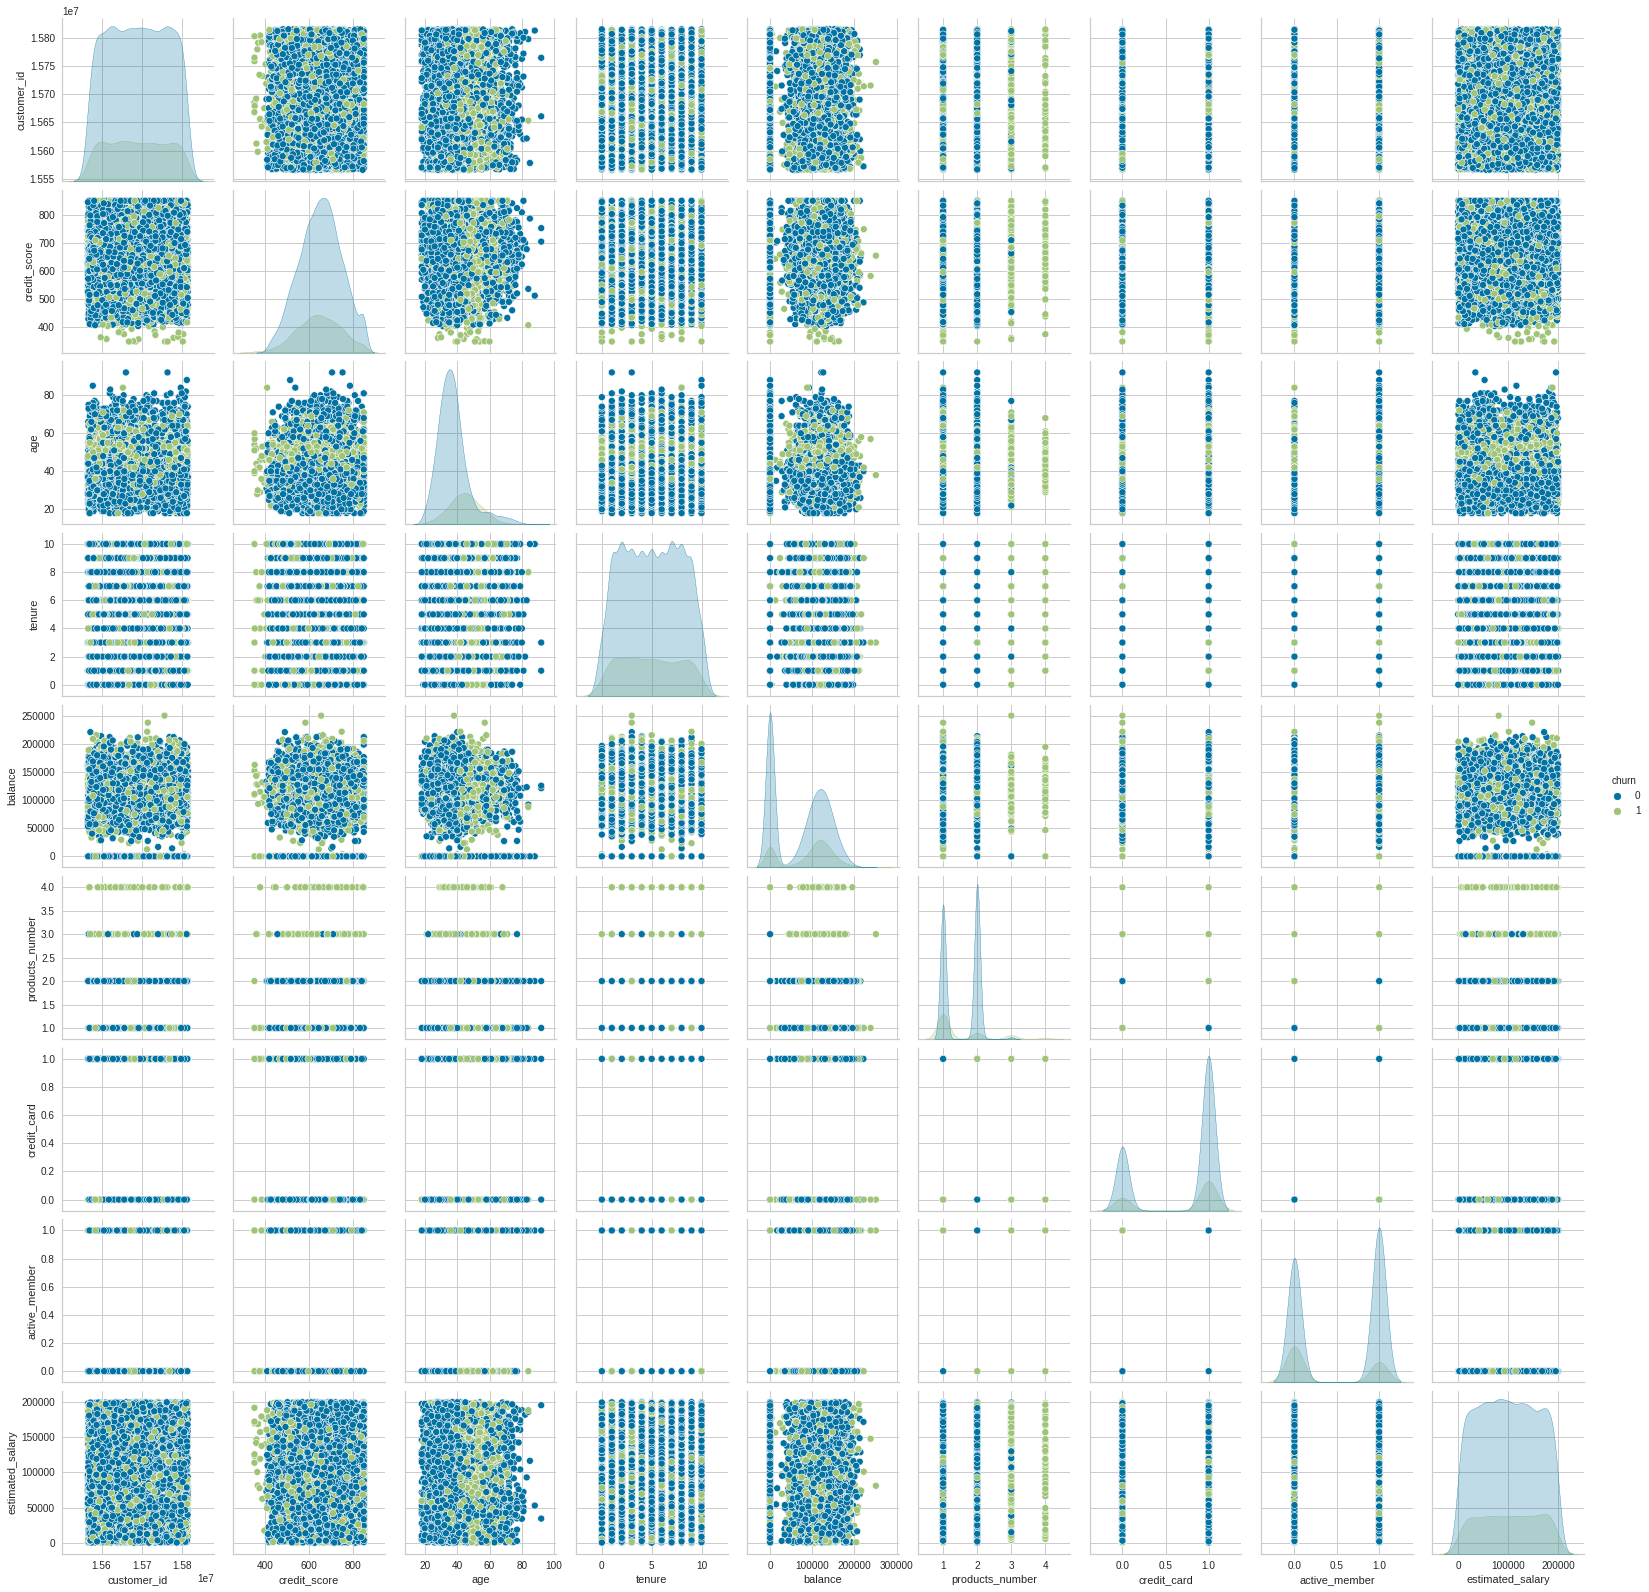

In [25]:
%matplotlib inline
sns.pairplot(df, hue = 'churn')